#Introduction
Intrusion Detection Systems (IDS) play a critical role in maintaining the security of computer networks by identifying malicious activities and potential threats. With the ever-increasing volume and complexity of network traffic, leveraging machine learning techniques has become essential for building robust and scalable IDS solutions.

This notebook presents a machine learning-based approach to intrusion detection using the NSL-KDD dataset. The NSL-KDD dataset is a widely used benchmark for evaluating intrusion detection systems and contains labeled data representing normal and attack traffic.

##Objectives


1.   Preprocess Data: Convert raw dataset features into formats suitable for machine learning, including handling categorical variables, normalizing numerical data, and addressing class imbalance.
2.   Train and Evaluate Models: Train multiple machine learning models, such as Decision Trees, Logistic Regression, Random Forests, Support Vector Machines (SVM), and XGBoost, to classify network traffic into normal or attack categories.
3.   Compare Model Performance: Analyze and compare the performance of the models using metrics such as accuracy, precision, recall, F1 score, and visualizations like confusion matrices, ROC curves, and precision-recall curves.
4.   Identify Key Features: Investigate feature importance to understand which factors contribute most to detecting intrusions.

The results of this analysis will help identify the best-performing model for intrusion detection and provide insights into improving network security.



In [ ]:
# Data Handling and Preprocessing
import pandas as pd            # DataFrame structure and data handling
import numpy as np             # Numerical operations

# Data Preprocessing
from sklearn.model_selection import train_test_split    # Train-test split
from sklearn.preprocessing import StandardScaler        # Feature scaling
from sklearn.preprocessing import OneHotEncoder         # Encoding categorical features
from imblearn.over_sampling import SMOTE                # Handling class imbalance

# Model Training
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from xgboost import XGBClassifier                       # XGBoost model

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score   # Evaluation metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc           # Additional metrics and ROC

# Visualization
import matplotlib.pyplot as plt     # Data visualization
import seaborn as sns               # Enhanced visualization

# Interpretability
import shap                          # SHAP for feature importance

# System
import warnings                      # To handle warnings
warnings.filterwarnings('ignore')


#Data Loading

In [ ]:
# Define column names for the NSL-KDD dataset
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label', 'difficulty'
]


In [ ]:
# Load the training data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sarmad Project/Dataset/KDDTrain+.txt', names=column_names, sep=",", header=None)

# Load the testing data
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sarmad Project/Dataset/KDDTest+.txt', names=column_names, sep=",", header=None)


In [ ]:
# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

# Display the first few rows of the testing data
print("Testing Data:")
print(test_data.head())


Training Data:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   

In [ ]:
# Check the shape to ensure we have all columns
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (125973, 43)
Testing Data Shape: (22544, 43)


In [ ]:
# Summary of the label distribution
print("Training Data Label Distribution:")
print(train_data['label'].value_counts())
print("Testing Data Label Distribution:")
print(test_data['label'].value_counts())

Training Data Label Distribution:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64
Testing Data Label Distribution:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgeta

#Exploratory Data Analysis

##Basic Data Overview
Start by understanding the overall structure and summary statistics of the dataset.

In [ ]:
# General information about the training dataset
print("Training Data Info:")
print(train_data.info())

# Summary statistics of numerical features
print("Training Data Description:")
print(train_data.describe())

# Check for missing values
print("Missing Values in Training Data:")
print(train_data.isnull().sum())

# Display label distribution
print("Label Distribution in Training Data:")
print(train_data['label'].value_counts())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 no

##Data Types and Feature Groups
The dataset contains a mix of categorical and numerical features. We can categorize them for focused analysis.

In [ ]:
# Separate categorical and numerical features
categorical_features = ['protocol_type', 'service', 'flag']
numerical_features = [col for col in train_data.columns if col not in categorical_features + ['label', 'difficulty']]

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['protocol_type', 'service', 'flag']
Numerical Features: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


##Visualizing Categorical Features
Analyze the distribution of categorical features like protocol_type, service, and flag.

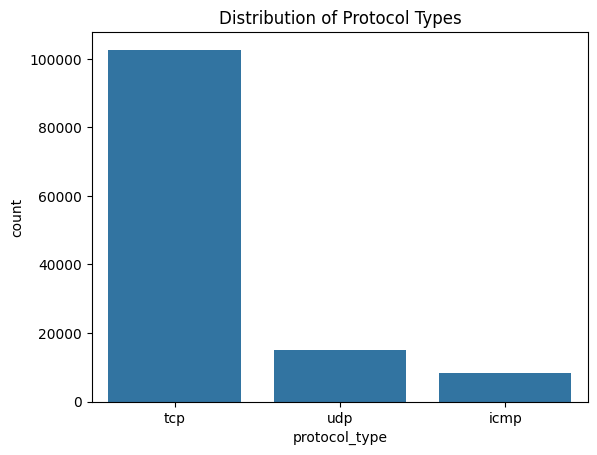

In [ ]:
# Distribution of 'protocol_type'
sns.countplot(data=train_data, x='protocol_type', order=train_data['protocol_type'].value_counts().index)
plt.title('Distribution of Protocol Types')
plt.show()



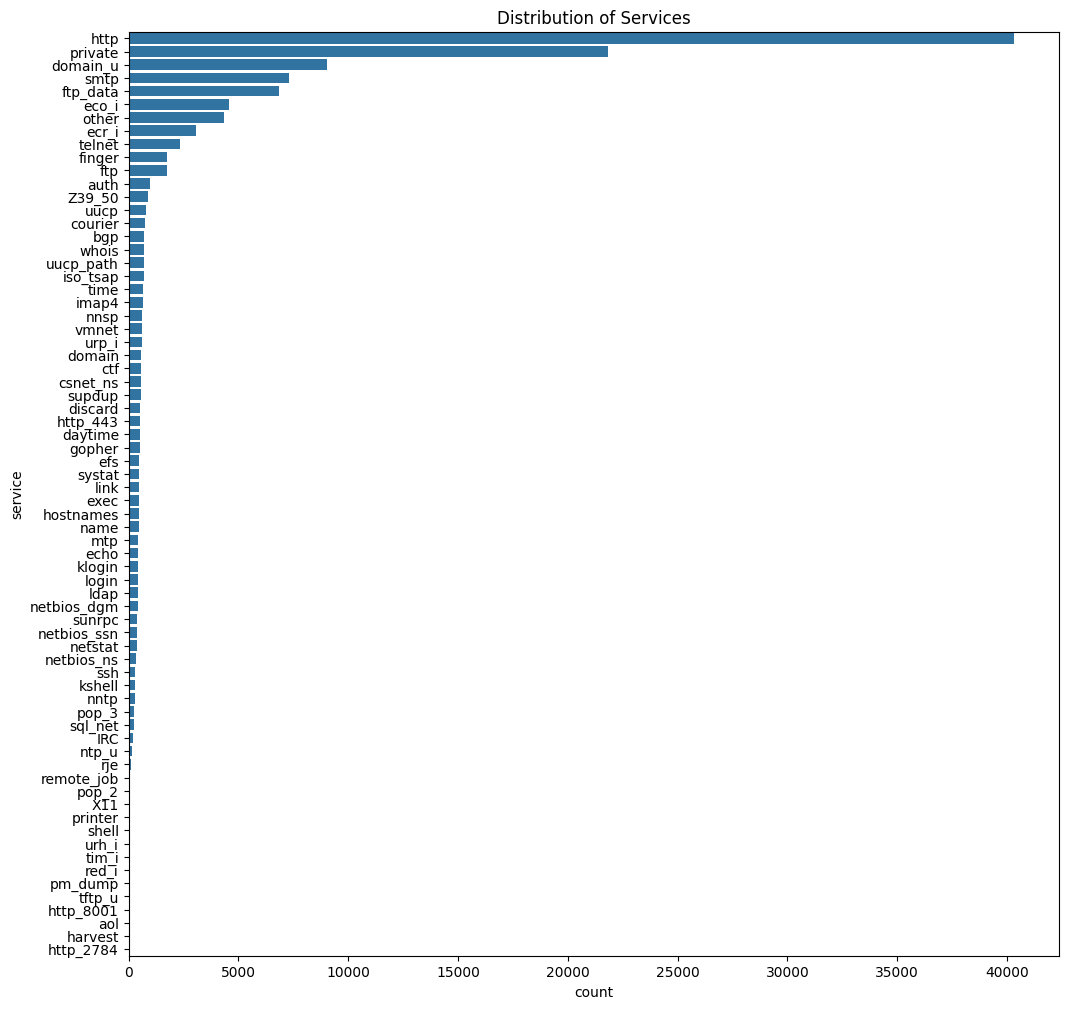

In [ ]:
# Distribution of 'service'
plt.figure(figsize=(12, 12))
sns.countplot(data=train_data, y='service', order=train_data['service'].value_counts().index)
plt.title('Distribution of Services')
plt.show()


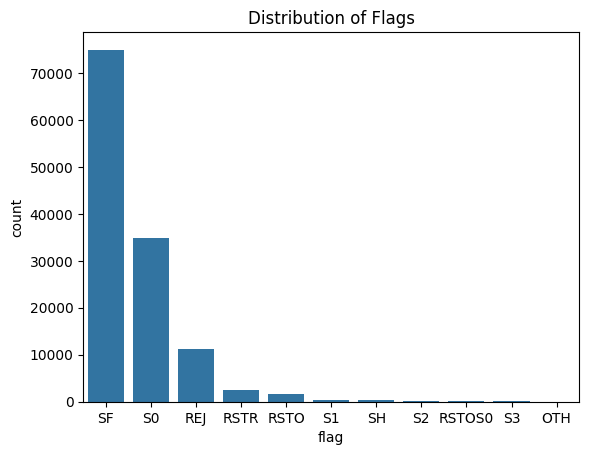

In [ ]:
# Distribution of 'flag'
sns.countplot(data=train_data, x='flag', order=train_data['flag'].value_counts().index)
plt.title('Distribution of Flags')
plt.show()

##Visualizing Label Distribution
Analyze the distribution of attack types and normal traffic.

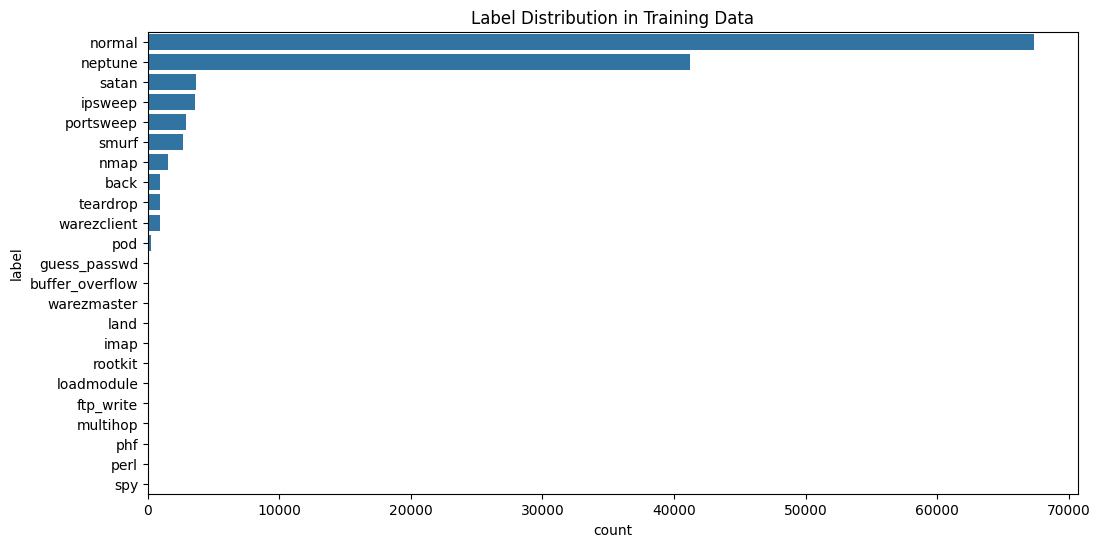

In [ ]:
# Bar plot for label distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, y='label', order=train_data['label'].value_counts().index)
plt.title('Label Distribution in Training Data')
plt.show()


##Correlation Analysis of Numerical Features
Identify correlations between numerical features to detect multicollinearity or feature redundancies.

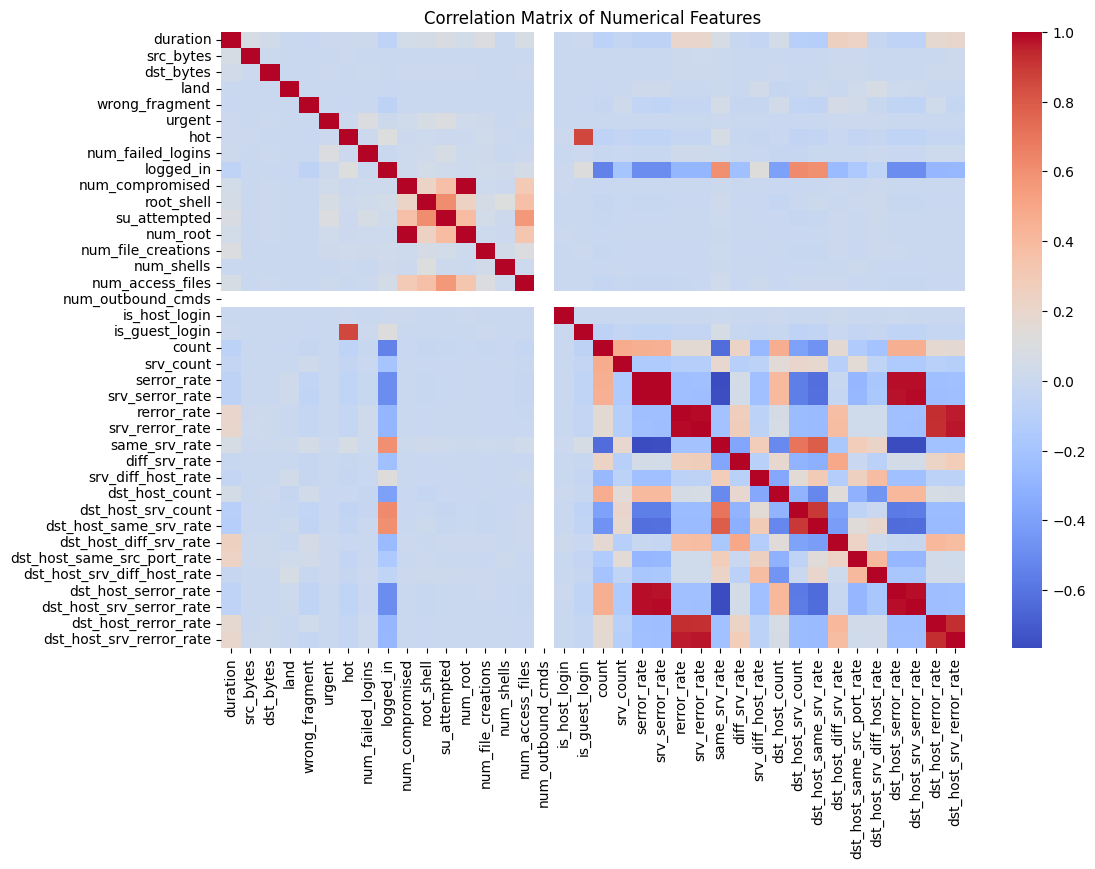

In [ ]:
# Correlation matrix
correlation_matrix = train_data[numerical_features].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


##Statistical Analysis of Features
Examine feature distributions and relationships with the target variable.

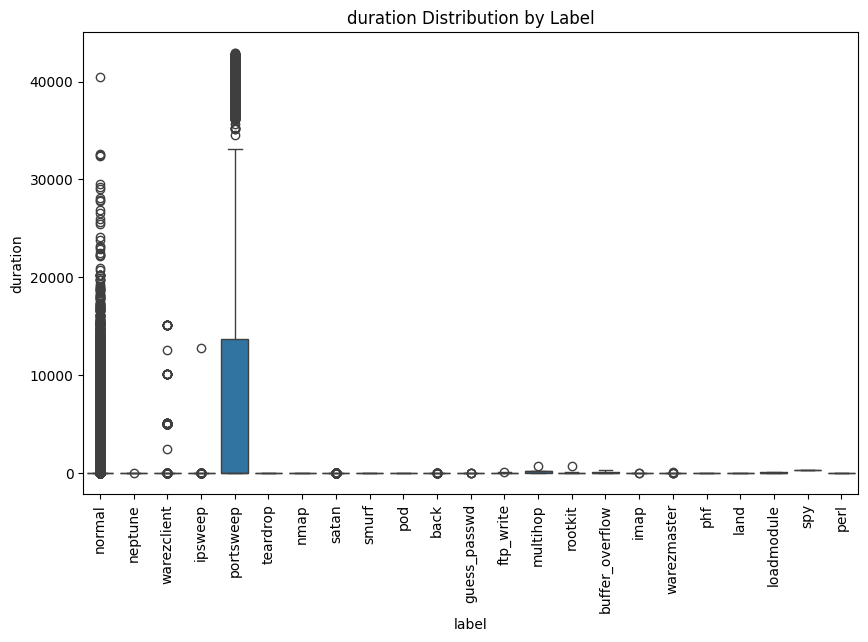

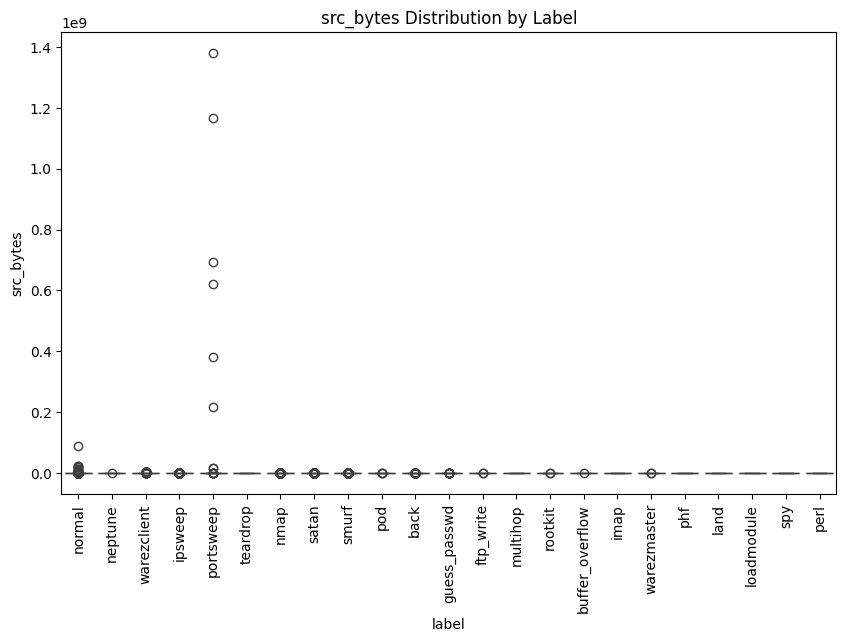

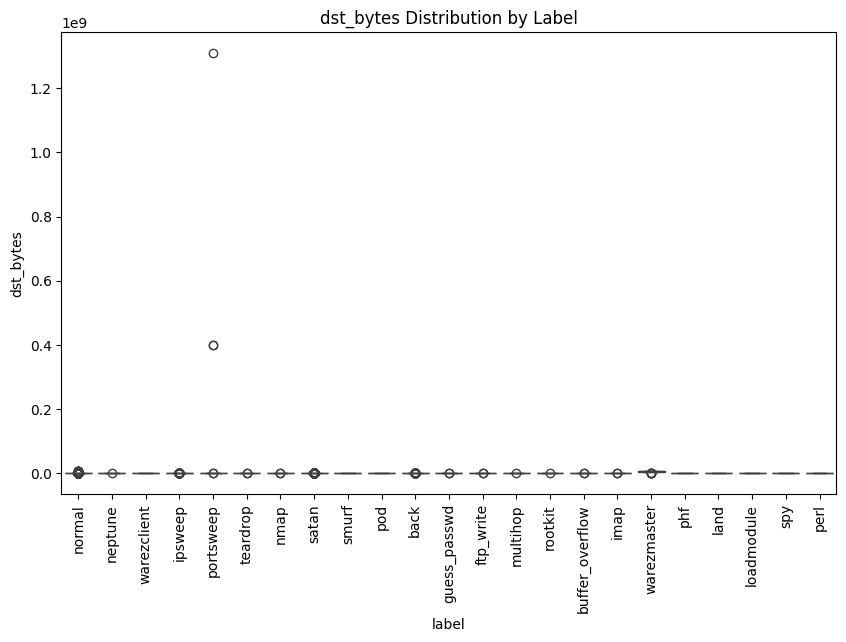

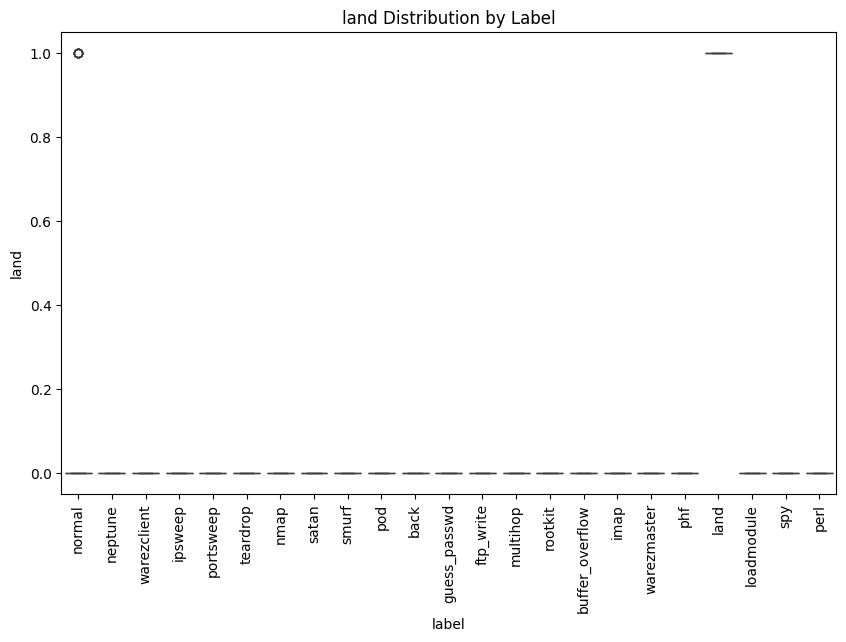

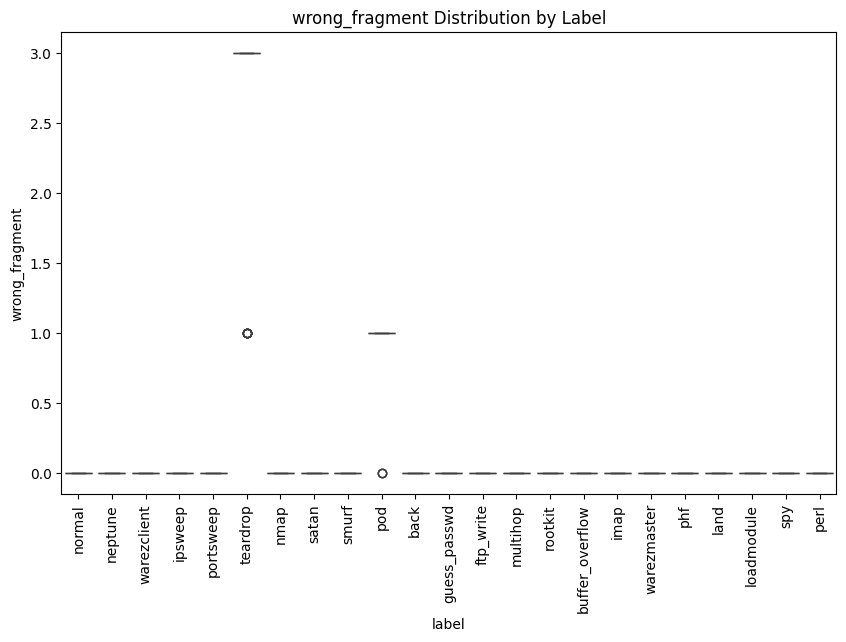

In [ ]:
# Box plot of numerical features grouped by 'label'
for feature in numerical_features[:5]:  # Limiting to first 5 for simplicity
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_data, x='label', y=feature)
    plt.title(f'{feature} Distribution by Label')
    plt.xticks(rotation=90)
    plt.show()


##Analyze Class Imbalance
Determine whether the dataset is balanced across different labels.

In [ ]:
# Count and percentage of each label
label_counts = train_data['label'].value_counts()
label_percentages = (label_counts / len(train_data)) * 100

print("Label Counts:")
print(label_counts)
print("\nLabel Percentages:")
print(label_percentages)


Label Counts:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label Percentages:
label
normal             53.458281
neptune            32.716534
satan               2.883951
ipsweep             2.856961
portsweep           2.326689
smurf               2.100450
nmap                1.185175
back                0.758893
teardrop            0.708088
warezclient         0.706501
pod                 0.159558
guess_passwd        0.042073
buffe

##Visualizing Pairwise Relationships
Visualize pairwise relationships between key numerical features and the target variable using pair plots.

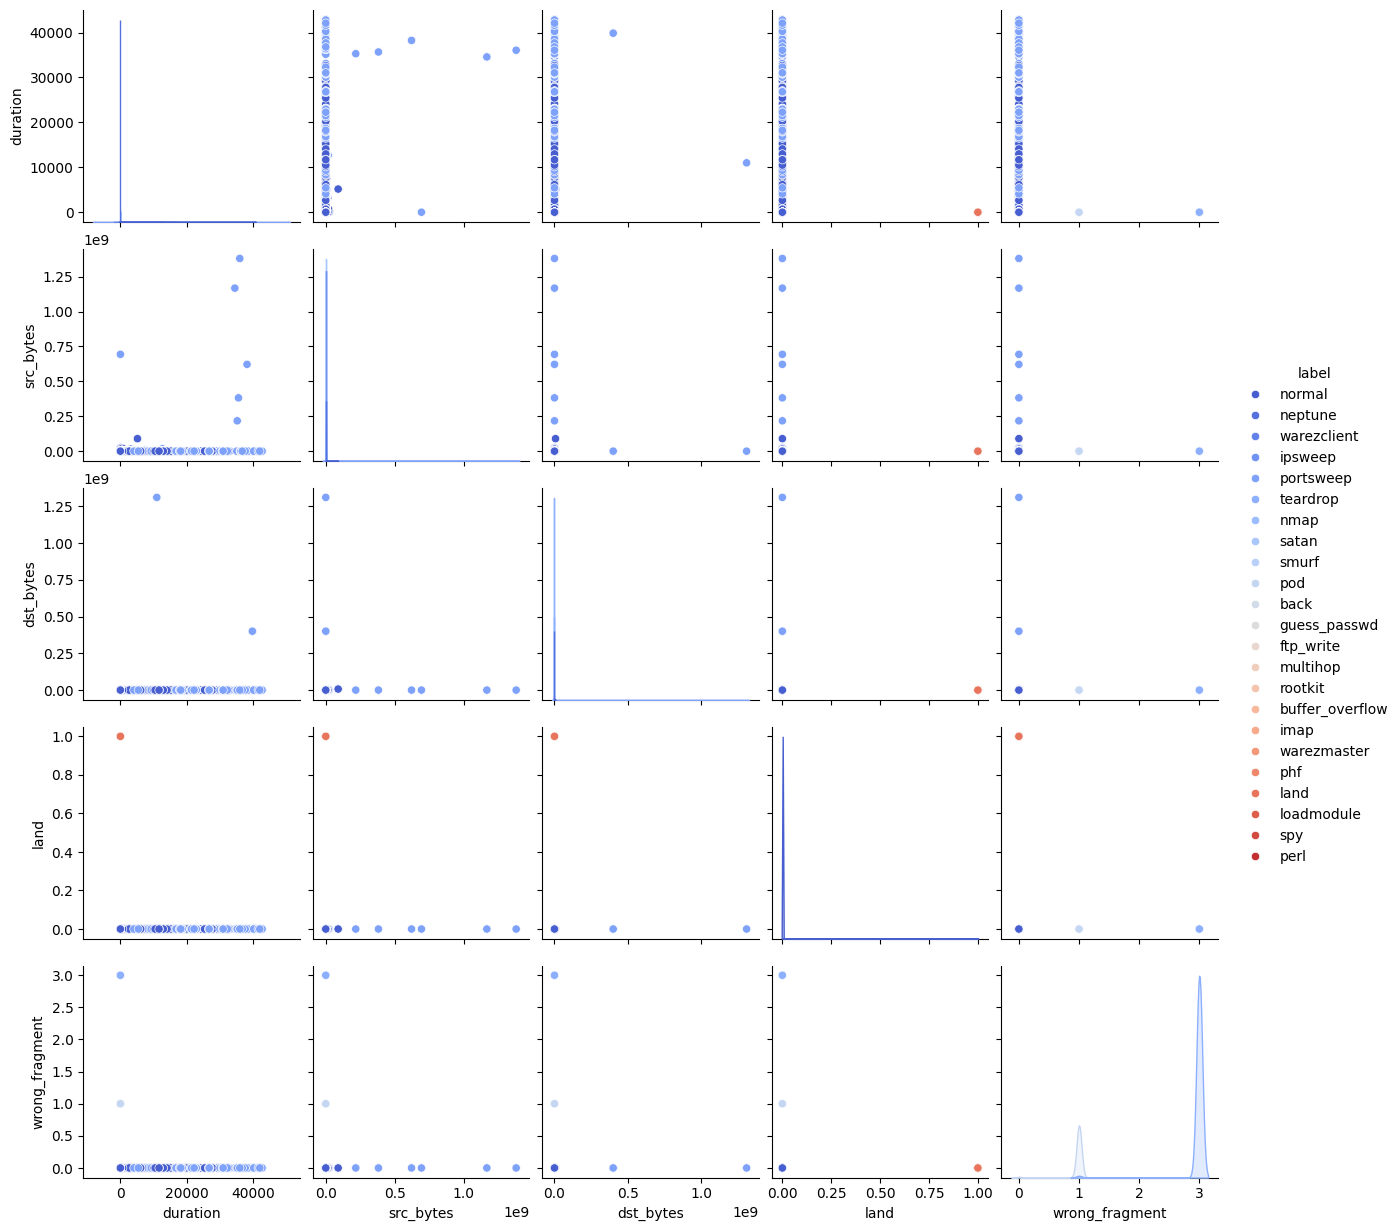

In [ ]:
# Select a subset of numerical features for visualization
selected_features = numerical_features[:5]  # Select first 5 numerical features
sns.pairplot(train_data, vars=selected_features, hue='label', palette='coolwarm')
plt.show()


#Data Preprocessing
This involves preparing the data for machine learning models by handling categorical features, normalizing numerical features, and addressing class imbalance.

##Encode Categorical Features
We need to convert non-numeric columns (protocol_type, service, flag) into numerical representations for models to process.

In [ ]:
# One-hot encoding categorical features
categorical_features = ['protocol_type', 'service', 'flag']
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)

# Align training and testing datasets to ensure they have the same columns
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)


##Normalize Numerical Features
Normalize numerical columns (src_bytes, dst_bytes, etc.) to standardize their ranges.

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
                      'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
                      'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                      'num_access_files', 'count', 'srv_count']

# Initialize scaler
scaler = StandardScaler()

# Scale training and testing data
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])


##Handle Class Imbalance
Use SMOTE to oversample minority classes in the training dataset.

In [ ]:
from imblearn.over_sampling import SMOTE

# Split data into features and target
X_train = train_data_encoded.drop(['label', 'difficulty'], axis=1)
y_train = train_data_encoded['label']

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verify class distribution after SMOTE
print(y_train_balanced.value_counts())


label
normal             67343
ftp_write          67343
spy                67343
loadmodule         67343
land               67343
phf                67343
warezmaster        67343
imap               67343
buffer_overflow    67343
rootkit            67343
multihop           67343
guess_passwd       67343
neptune            67343
back               67343
pod                67343
smurf              67343
satan              67343
nmap               67343
teardrop           67343
portsweep          67343
ipsweep            67343
warezclient        67343
perl               67343
Name: count, dtype: int64


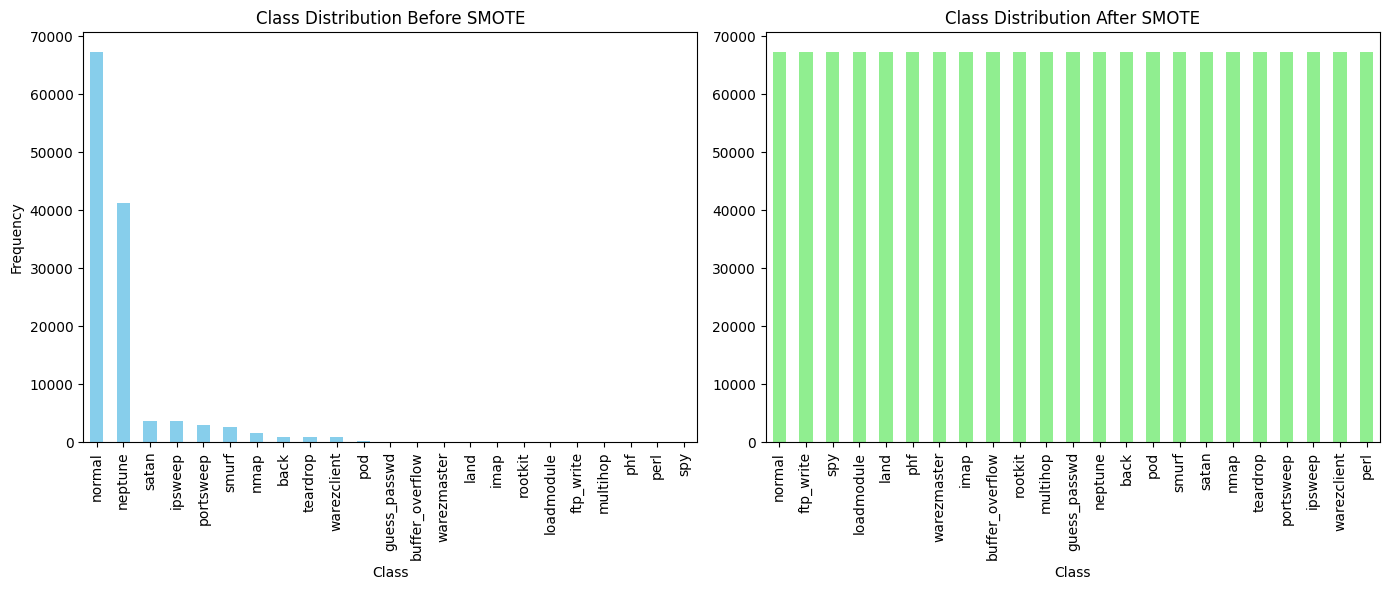

In [ ]:
import matplotlib.pyplot as plt

# Plot class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before SMOTE
y_train.value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')

# After SMOTE
y_train_balanced.value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Class')

plt.tight_layout()
plt.show()


#Model Training
Now that your data is preprocessed, you can move to model training. Start with a baseline model like Random Forest.

##Train-Test Split
Divide the training data further into a training and validation set for hyperparameter tuning.

In [ ]:
from sklearn.model_selection import train_test_split

# Split balanced training data into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)


##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_final, y_train_final)

# Make predictions on the validation set
y_val_pred_dt = dt_model.predict(X_val)

# Evaluate model performance
from sklearn.metrics import classification_report

print("Decision Tree Classification Report:")
print(classification_report(y_val, y_val_pred_dt))


Decision Tree Classification Report:
                 precision    recall  f1-score   support

           back       1.00      1.00      1.00     13553
buffer_overflow       1.00      1.00      1.00     13427
      ftp_write       1.00      1.00      1.00     13247
   guess_passwd       1.00      1.00      1.00     13442
           imap       1.00      1.00      1.00     13330
        ipsweep       1.00      1.00      1.00     13356
           land       1.00      1.00      1.00     13531
     loadmodule       1.00      1.00      1.00     13410
       multihop       1.00      1.00      1.00     13529
        neptune       1.00      1.00      1.00     13530
           nmap       1.00      1.00      1.00     13638
         normal       1.00      1.00      1.00     13287
           perl       1.00      1.00      1.00     13497
            phf       1.00      1.00      1.00     13618
            pod       1.00      1.00      1.00     13458
      portsweep       1.00      1.00      1.00    

###Decision Tree Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
precision_dt = precision_score(y_val, y_val_pred_dt, average='weighted')
recall_dt = recall_score(y_val, y_val_pred_dt, average='weighted')
f1_dt = f1_score(y_val, y_val_pred_dt, average='weighted')

print(f"Decision Tree - Accuracy: {accuracy_dt}")
print(f"Decision Tree - Precision: {precision_dt}")
print(f"Decision Tree - Recall: {recall_dt}")
print(f"Decision Tree - F1 Score: {f1_dt}")

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_val, y_val_pred_dt)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)


Decision Tree - Accuracy: 0.9997578911349418
Decision Tree - Precision: 0.9997578864944994
Decision Tree - Recall: 0.9997578911349418
Decision Tree - F1 Score: 0.9997578788399093
Decision Tree Confusion Matrix:
[[13553     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0 13425     0     1     0     0     0     1     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0 13246     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0 13442     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0 13330     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 13340     0     0     0     0    15     1


###Decision Tree Feature Importance

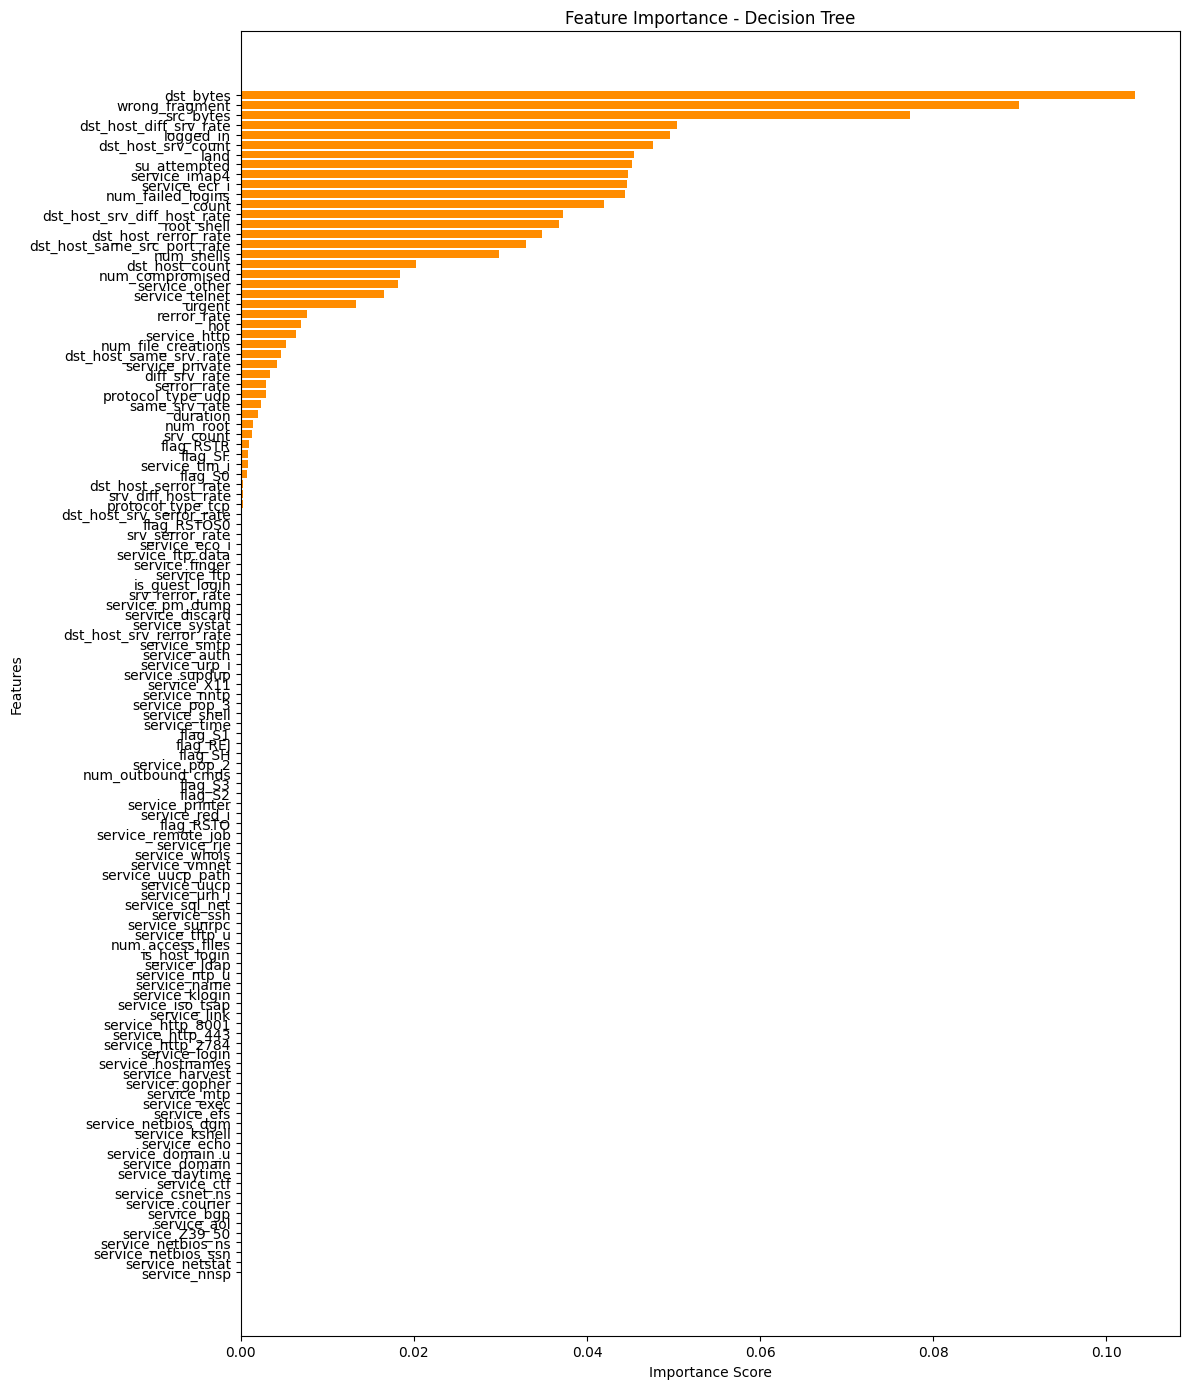

In [ ]:
# Decision Tree Feature Importance
feature_importances = dt_model.feature_importances_
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(12, 14))
plt.barh(X_train_final.columns[sorted_indices], feature_importances[sorted_indices], color='darkorange')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
logreg_model = LogisticRegression(max_iter=500, random_state=42)
logreg_model.fit(X_train_final, y_train_final)

# Make predictions on the validation set
y_val_pred_logreg = logreg_model.predict(X_val)

# Evaluate model performance
from sklearn.metrics import classification_report

print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_val_pred_logreg))


Logistic Regression Classification Report:
                 precision    recall  f1-score   support

           back       0.96      0.98      0.97     13553
buffer_overflow       0.92      0.73      0.81     13427
      ftp_write       0.87      1.00      0.93     13247
   guess_passwd       1.00      1.00      1.00     13442
           imap       0.98      0.98      0.98     13330
        ipsweep       0.70      0.88      0.78     13356
           land       1.00      1.00      1.00     13531
     loadmodule       0.82      0.89      0.85     13410
       multihop       0.84      1.00      0.91     13529
        neptune       0.95      0.91      0.93     13530
           nmap       0.83      0.64      0.72     13638
         normal       0.92      0.76      0.83     13287
           perl       1.00      1.00      1.00     13497
            phf       1.00      1.00      1.00     13618
            pod       1.00      0.99      0.99     13458
      portsweep       0.90      0.91      0.

###Logistic Regression Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
precision_logreg = precision_score(y_val, y_val_pred_logreg, average='weighted')
recall_logreg = recall_score(y_val, y_val_pred_logreg, average='weighted')
f1_logreg = f1_score(y_val, y_val_pred_logreg, average='weighted')

print(f"Logistic Regression - Accuracy: {accuracy_logreg}")
print(f"Logistic Regression - Precision: {precision_logreg}")
print(f"Logistic Regression - Recall: {recall_logreg}")
print(f"Logistic Regression - F1 Score: {f1_logreg}")

# Confusion matrix
conf_matrix_logreg = confusion_matrix(y_val, y_val_pred_logreg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logreg)


Logistic Regression - Accuracy: 0.924775161567316
Logistic Regression - Precision: 0.9279837105022223
Logistic Regression - Recall: 0.924775161567316
Logistic Regression - F1 Score: 0.9238992773697298
Logistic Regression Confusion Matrix:
[[13348     0     0     0     0     0     0    65    62     0     0    78
      0     0     0     0     0     0     0     0     0     0     0]
 [    0  9837   880     0     0     0     0  2235     0     0     0     0
      0     0     0     0     0     0     0     0     0   475     0]
 [    0     0 13247     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [   57     0     0 13385     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0 13026     0     0     0   129     0     0     0
      0     0     0     0   175     0     0     0     0     0     0]
 [    1     0    16     0     0 11700     0   

###Logistic Regression Feature Importance
For Logistic Regression, the coefficients represent the importance of features. Standardizing features before training is critical for proper interpretation.

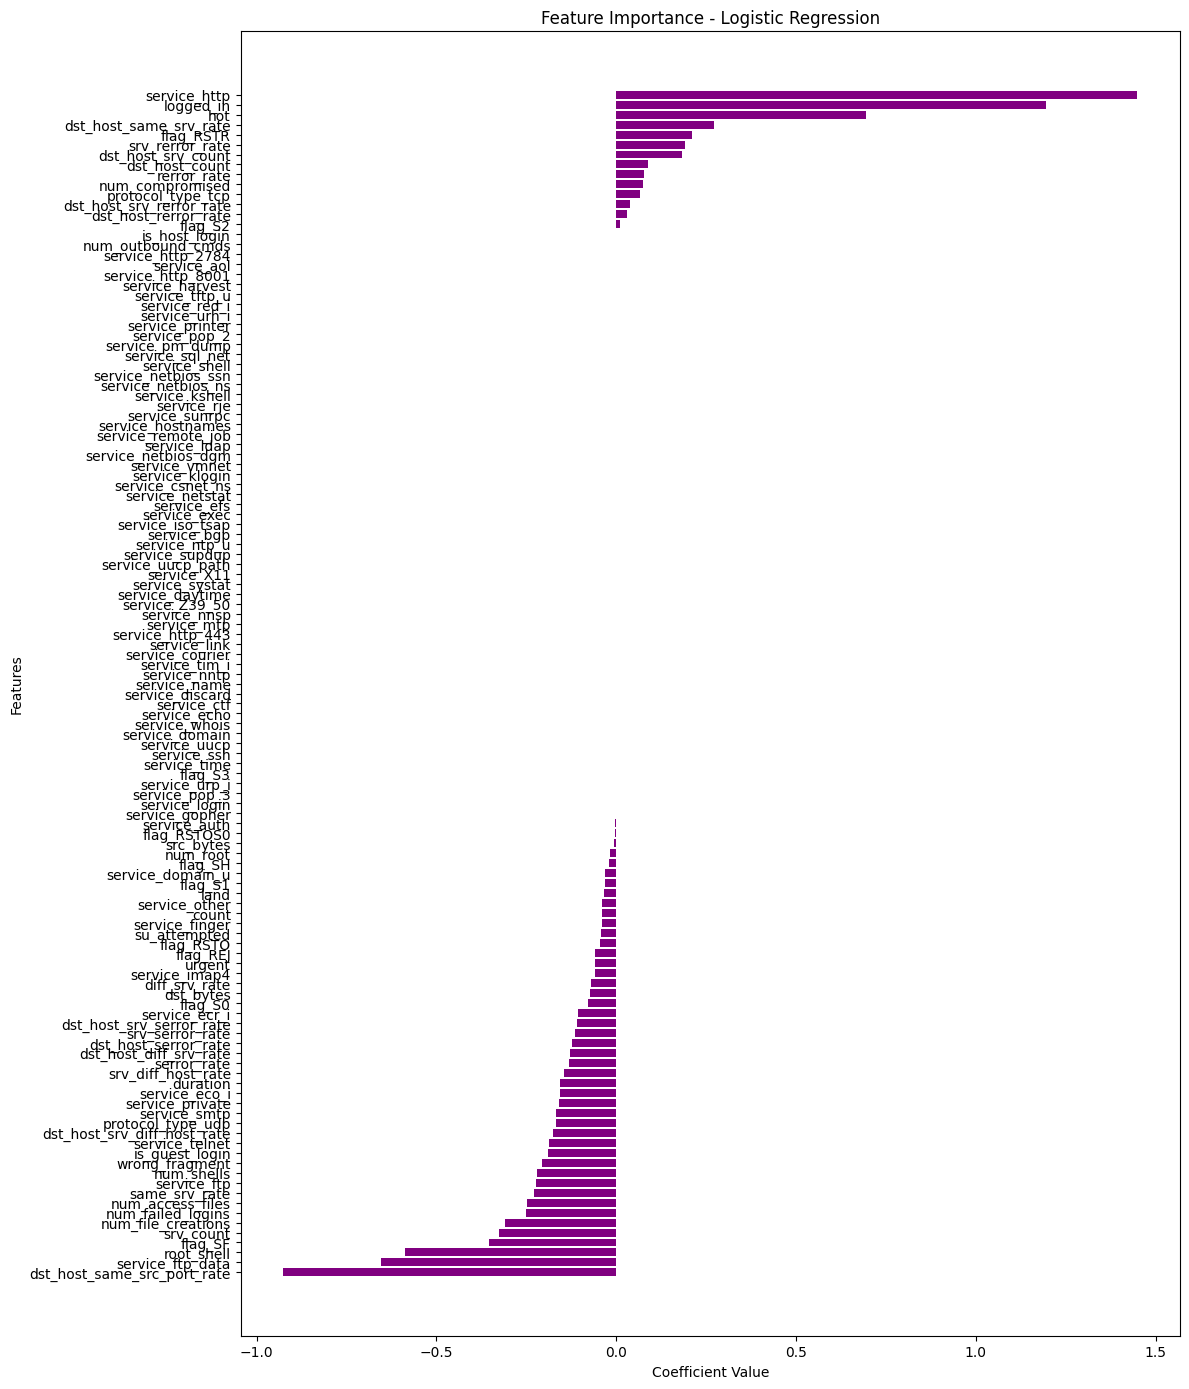

In [ ]:
# Logistic Regression Feature Importance
coefficients = logreg_model.coef_[0]  # Get the coefficients
sorted_indices = coefficients.argsort()

plt.figure(figsize=(12, 14))
plt.barh(X_train_final.columns[sorted_indices], coefficients[sorted_indices], color='purple')
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_final, y_train_final)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate model performance
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_val, y_val_pred))


Random Forest Classification Report:
                 precision    recall  f1-score   support

           back       1.00      1.00      1.00     13553
buffer_overflow       1.00      1.00      1.00     13427
      ftp_write       1.00      1.00      1.00     13247
   guess_passwd       1.00      1.00      1.00     13442
           imap       1.00      1.00      1.00     13330
        ipsweep       1.00      1.00      1.00     13356
           land       1.00      1.00      1.00     13531
     loadmodule       1.00      1.00      1.00     13410
       multihop       1.00      1.00      1.00     13529
        neptune       1.00      1.00      1.00     13530
           nmap       1.00      1.00      1.00     13638
         normal       1.00      1.00      1.00     13287
           perl       1.00      1.00      1.00     13497
            phf       1.00      1.00      1.00     13618
            pod       1.00      1.00      1.00     13458
      portsweep       1.00      1.00      1.00    

###Random Forest Model Evaluation
Assess model performance using metrics such as Accuracy, Precision, Recall, F1-Score, and the Confusion Matrix.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9998450503263627
Precision: 0.9998450513615684
Recall: 0.9998450503263627
F1 Score: 0.9998450488045326
Confusion Matrix:
[[13553     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0 13427     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0 13247     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0 13441     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0 13330     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 13339     0     0     0     0    15     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0  

###Random Forest Feature Importance

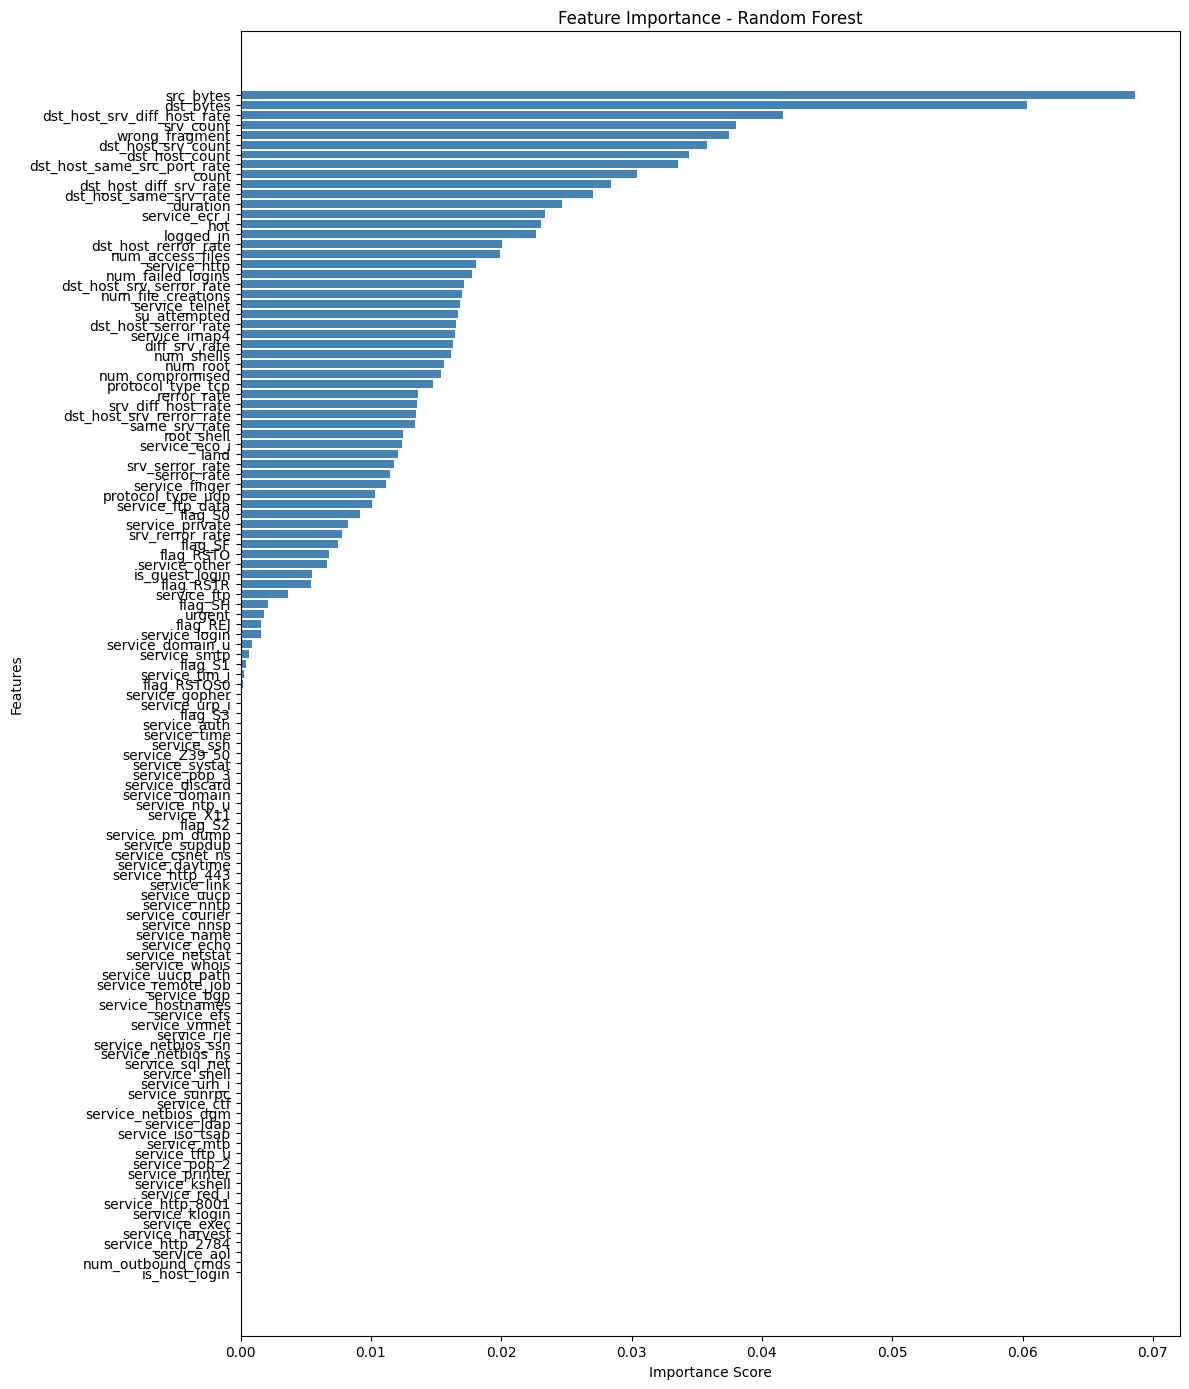

In [ ]:
# Random Forest Feature Importance
feature_importances = rf_model.feature_importances_
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(12, 14))
plt.barh(X_train_final.columns[sorted_indices], feature_importances[sorted_indices], color='steelblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


##Training with XGBoost

###Import and Initialize XGBoost and Train the Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Encode the labels in the training and validation sets
y_train_final_encoded = label_encoder.fit_transform(y_train_final)
y_val_encoded = label_encoder.transform(y_val)


In [ ]:
from xgboost import DMatrix, train

# Convert data to DMatrix
dtrain = DMatrix(X_train_final, label=y_train_final_encoded)
params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': len(np.unique(y_train_final_encoded)),
    'random_state': 42
}

# Train XGBoost model
xgb_model = train(params, dtrain)


###Evaluate XGBoost Performance

In [ ]:
# Convert validation data to DMatrix
dval = DMatrix(X_val)

# Predict probabilities for each class
y_val_pred_proba = xgb_model.predict(dval)

# Convert probabilities to class labels
y_val_pred_xgb = np.argmax(y_val_pred_proba, axis=1)

# Decode predicted labels back to original classes
y_val_pred_labels = label_encoder.inverse_transform(y_val_pred_xgb)

# Evaluate the XGBoost model
from sklearn.metrics import classification_report
print("XGBoost Classification Report:")
print(classification_report(y_val, y_val_pred_labels))


XGBoost Classification Report:
                 precision    recall  f1-score   support

           back       1.00      1.00      1.00     13553
buffer_overflow       1.00      1.00      1.00     13427
      ftp_write       1.00      1.00      1.00     13247
   guess_passwd       1.00      1.00      1.00     13442
           imap       1.00      1.00      1.00     13330
        ipsweep       1.00      1.00      1.00     13356
           land       1.00      1.00      1.00     13531
     loadmodule       1.00      1.00      1.00     13410
       multihop       1.00      1.00      1.00     13529
        neptune       1.00      1.00      1.00     13530
           nmap       1.00      1.00      1.00     13638
         normal       1.00      0.99      0.99     13287
           perl       1.00      1.00      1.00     13497
            phf       1.00      1.00      1.00     13618
            pod       1.00      1.00      1.00     13458
      portsweep       1.00      1.00      1.00     13400

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Decode predictions back to original labels
y_val_pred_labels = label_encoder.inverse_transform(y_val_pred_xgb)

# Calculate metrics using decoded labels
accuracy_xgb = accuracy_score(y_val, y_val_pred_labels)
precision_xgb = precision_score(y_val, y_val_pred_labels, average='weighted')
recall_xgb = recall_score(y_val, y_val_pred_labels, average='weighted')
f1_xgb = f1_score(y_val, y_val_pred_labels, average='weighted')

print(f"XGBoost - Accuracy: {accuracy_xgb}")
print(f"XGBoost - Precision: {precision_xgb}")
print(f"XGBoost - Recall: {recall_xgb}")
print(f"XGBoost - F1 Score: {f1_xgb}")

# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_val, y_val_pred_labels)
print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)


XGBoost - Accuracy: 0.9992672171684238
XGBoost - Precision: 0.9992687582656211
XGBoost - Recall: 0.9992672171684238
XGBoost - F1 Score: 0.9992661574336447
XGBoost Confusion Matrix:
[[13553     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0 13427     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0 13247     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0 13442     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0 13330     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 13319     0     0     0     0    33     1
      0     0     0     0     

###XGBoost Feature Importance
XGBoost provides built-in methods for plotting feature importance directly:

<Figure size 1200x800 with 0 Axes>

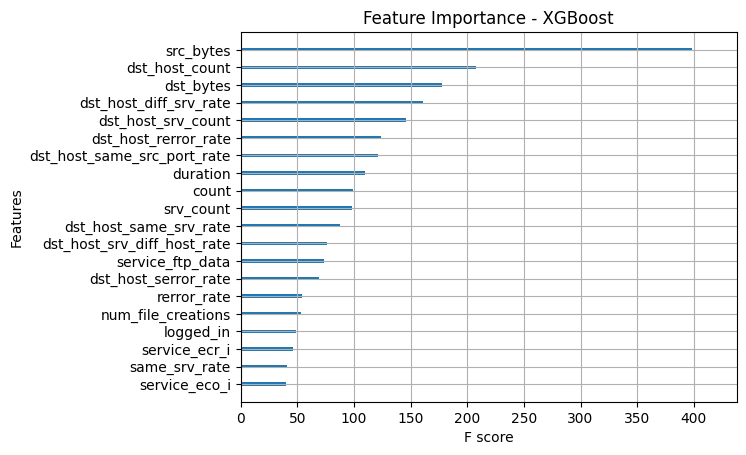

In [ ]:
# XGBoost Feature Importance
from xgboost import plot_importance

plt.figure(figsize=(12, 8))
plot_importance(xgb_model, max_num_features=20, importance_type='weight', show_values=False)
plt.title('Feature Importance - XGBoost')
plt.show()


##Summary Table of Feature Importance
Compile the feature importance for all models into a single table for easy comparison:

In [ ]:
# Extract XGBoost feature importance using the native Booster API
xgb_importance = xgb_model.get_score(importance_type='weight')  # Use 'weight' or other importance types
xgb_importance_df = pd.DataFrame(list(xgb_importance.items()), columns=['Feature', 'XGBoost_Importance'])
xgb_importance_df.set_index('Feature', inplace=True)

# Compile feature importance into a DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Random Forest': rf_model.feature_importances_,
    'Decision Tree': dt_model.feature_importances_,
    'Logistic Regression': logreg_model.coef_[0]
})

# Add XGBoost importance, aligning with feature names
importance_df = importance_df.merge(xgb_importance_df, left_on='Feature', right_index=True, how='left')

# Sort by Random Forest importance as a reference
importance_df = importance_df.sort_values(by='Random Forest', ascending=False)

# Display the DataFrame
print("Top 10 Important Features Across Models:")
print(importance_df.head(10))


Top 10 Important Features Across Models:
                        Feature  Random Forest  Decision Tree  \
1                     src_bytes       0.068653       0.077319   
2                     dst_bytes       0.060344       0.103335   
33  dst_host_srv_diff_host_rate       0.041598       0.037208   
20                    srv_count       0.038034       0.001364   
4                wrong_fragment       0.037493       0.089930   
29           dst_host_srv_count       0.035793       0.047647   
28               dst_host_count       0.034410       0.020279   
32  dst_host_same_src_port_rate       0.033563       0.032989   
19                        count       0.030404       0.042012   
31       dst_host_diff_srv_rate       0.028434       0.050444   

    Logistic Regression  XGBoost_Importance  
1             -0.005007               398.0  
2             -0.074230               178.0  
33            -0.175472                76.0  
20            -0.326714                98.0  
4            

#Final Model Testing
Once the best model is selected, evaluate its performance on the testing dataset.

In [ ]:
# Make predictions on the test set
X_test = test_data_encoded.drop(['label', 'difficulty'], axis=1)
y_test = test_data_encoded['label']

##Make Predictions and Evaluate Models

###Random Forest

In [ ]:
# Make predictions with Random Forest
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

# Print metrics
print("Random Forest Test Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf, labels=label_encoder.classes_)
print("Random Forest Test Confusion Matrix:")
print(conf_matrix_rf)


Random Forest Test Metrics:
Accuracy: 0.7217885024840313
Precision: 0.5490199818960463
Recall: 0.7217885024840313
F1 Score: 0.6184152595758579
Random Forest Test Confusion Matrix:
[[ 346    0    0    0    0    0    0    0    0    0    0   13    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0   19    0    0
     0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    3    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1231    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  139    0    0    0    0    0    2    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    5    0    0    0    0    2    0    0
     0    0    0    0    0  

###Decision Tree

In [ ]:
# Make predictions with Decision Tree
y_test_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_test_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_test_pred_dt, average='weighted')

# Print metrics
print("Decision Tree Test Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt, labels=label_encoder.classes_)
print("Decision Tree Test Confusion Matrix:")
print(conf_matrix_dt)


Decision Tree Test Metrics:
Accuracy: 0.6875443577004968
Precision: 0.5932618795014746
Recall: 0.6875443577004968
F1 Score: 0.5996460254469052
Decision Tree Test Confusion Matrix:
[[ 137    0    0    0    0    0    0    0    0    0    0  222    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0   16    2    0
     0    0    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    3    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0   37    0    0    0    0    0    0    0 1181    0    0
     0    0    1   12    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  140    0    0    0    0    0    0    0    0
     0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    6    0    0    0    0    1    0    0
     0    0    0    0    0  

###Logistic Regression

In [ ]:
# Make predictions with Logistic Regression
y_test_pred_logreg = logreg_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
precision_logreg = precision_score(y_test, y_test_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_test_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_test_pred_logreg, average='weighted')

# Print metrics
print("Logistic Regression Test Metrics:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1 Score: {f1_logreg}")

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_test_pred_logreg, labels=label_encoder.classes_)
print("Logistic Regression Test Confusion Matrix:")
print(conf_matrix_logreg)


Logistic Regression Test Metrics:
Accuracy: 0.5800212916962385
Precision: 0.6342935280186904
Recall: 0.5800212916962385
F1 Score: 0.5603557073289085
Logistic Regression Test Confusion Matrix:
[[ 354    0    0    0    0    0    0    0    0    0    0    5    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    1    5    0
     0    0    7    0    0    1    0    0    5]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    2    0    0    1    0    0    0]
 [  61    0    0  181    0    0    0    4    1    0    0  842    0    0
     0    0  100    0    0    0    0   42    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    1    0    0    0    0    0    0    0]
 [   0    0    0    0    0  138    0    0    1    0    0    0    0    0
     0    0    2    0    0    0    0    0    0]
 [   0    0    0    0    0    0    5    0    0    2    0    0    0    0
     0    0    0

###XGBoost

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert test data to DMatrix
dtest = DMatrix(X_test)

# Make predictions using the Booster model
y_test_pred_xgb = xgb_model.predict(dtest)

# For multi-class classification, get the class with the highest probability
y_test_pred_labels_xgb = label_encoder.inverse_transform(y_test_pred_xgb.argmax(axis=1))

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_test_pred_labels_xgb)
precision_xgb = precision_score(y_test, y_test_pred_labels_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_test_pred_labels_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_test_pred_labels_xgb, average='weighted')

# Print metrics
print("XGBoost Test Metrics (Native Booster):")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_labels_xgb, labels=label_encoder.classes_)
print("XGBoost Test Confusion Matrix (Native Booster):")
print(conf_matrix_xgb)


XGBoost Test Metrics (Native Booster):
Accuracy: 0.7289300922640171
Precision: 0.6571777944816204
Recall: 0.7289300922640171
F1 Score: 0.6461980195650339
XGBoost Test Confusion Matrix (Native Booster):
[[ 359    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    8    0    1    0    0    0    2    0    0    0    5    2    0
     0    0    2    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    0    1]
 [   0    0    0  231    0    0    0    0    0    0    0  979    0    0
     0    0    5   16    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  138    0    0    0    0    1    1    0    0
     0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    7    0    0    0    0    0    0    0
     0

##Summarize Results

We can compile the metrics into a summary table for easy comparison:

In [ ]:
# Create a summary table
test_results = {
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"],
    "Accuracy": [accuracy_rf, accuracy_dt, accuracy_logreg, accuracy_xgb],
    "Precision": [precision_rf, precision_dt, precision_logreg, precision_xgb],
    "Recall": [recall_rf, recall_dt, recall_logreg, recall_xgb],
    "F1 Score": [f1_rf, f1_dt, f1_logreg, f1_xgb]
}

# Convert to DataFrame
import pandas as pd
results_df = pd.DataFrame(test_results)

# Display the results
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.721789   0.549020  0.721789  0.618415
1        Decision Tree  0.687544   0.593262  0.687544  0.599646
2  Logistic Regression  0.580021   0.634294  0.580021  0.560356
3              XGBoost  0.728930   0.657178  0.728930  0.646198


###Define a Function for Confusion Matrix Visualization

In [ ]:
def plot_confusion_matrix(conf_matrix, model_name, class_labels=None):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


####Random Forest

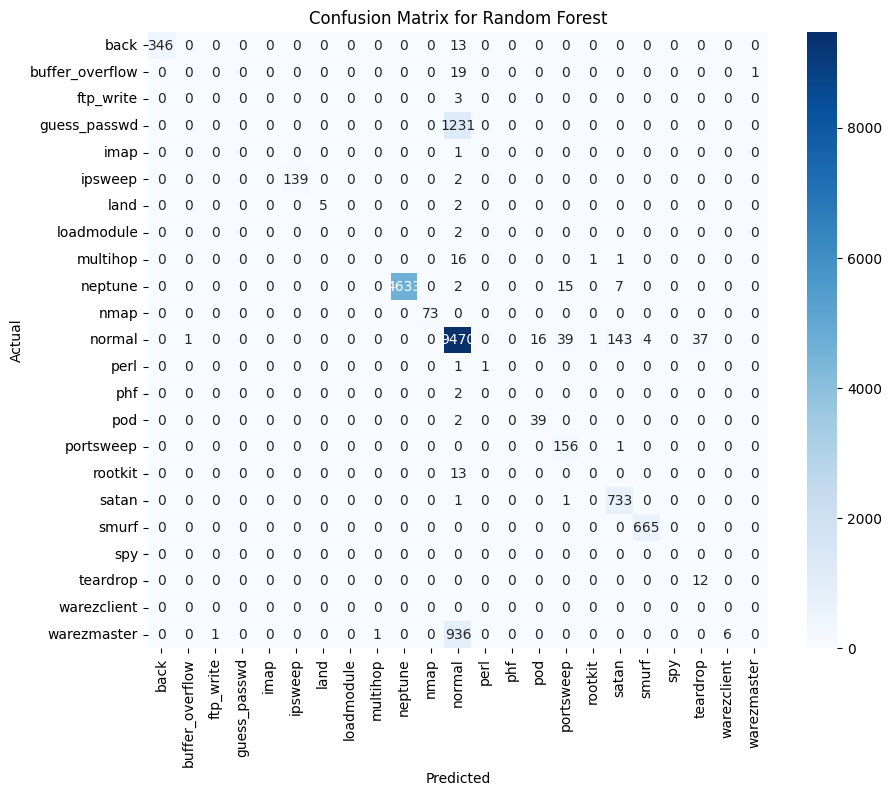

In [ ]:
plot_confusion_matrix(conf_matrix_rf, model_name="Random Forest", class_labels=label_encoder.classes_)


####Decision Tree

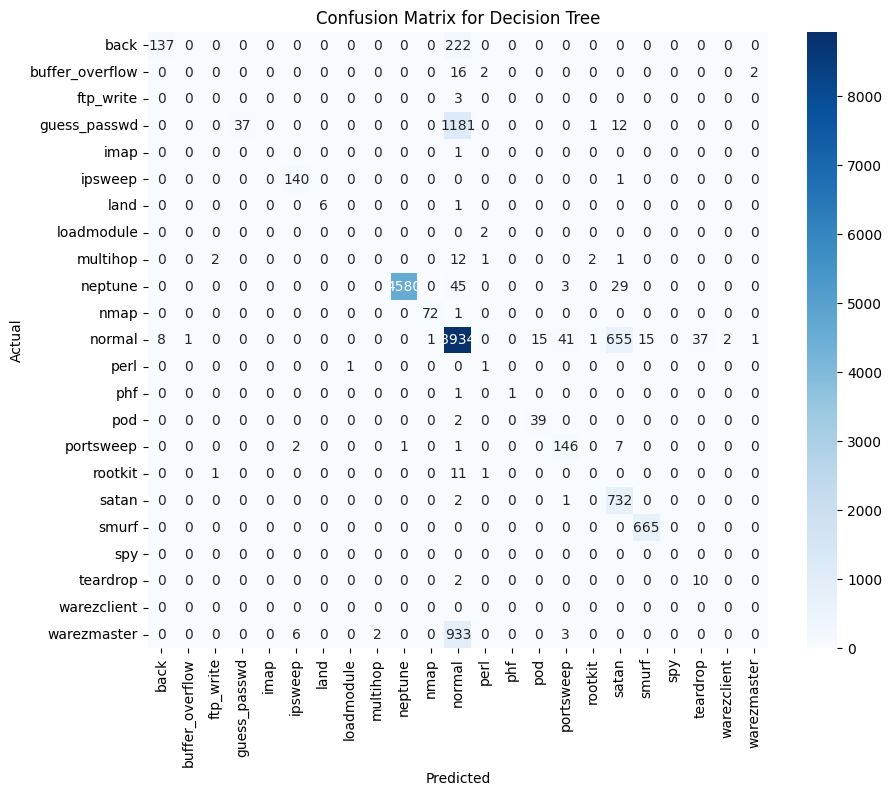

In [ ]:
plot_confusion_matrix(conf_matrix_dt, model_name="Decision Tree", class_labels=label_encoder.classes_)


####Logistic Regression

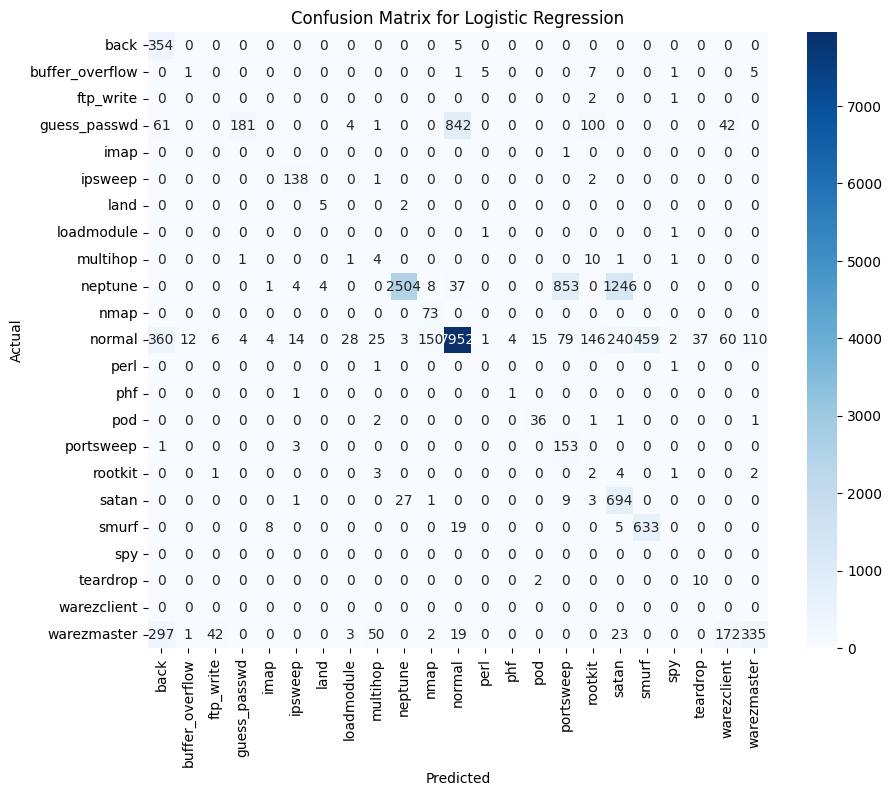

In [ ]:
plot_confusion_matrix(conf_matrix_logreg, model_name="Logistic Regression", class_labels=label_encoder.classes_)


####XGBoost

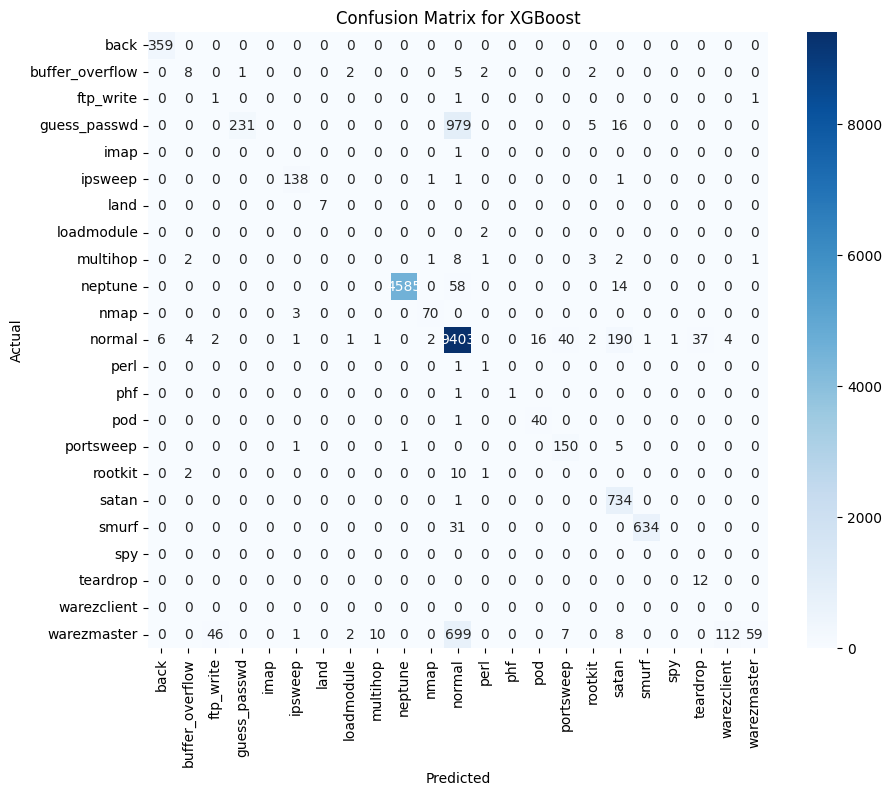

In [ ]:
plot_confusion_matrix(conf_matrix_xgb, model_name="XGBoost", class_labels=label_encoder.classes_)


###ROC and Precision-Recall Curves

Plotting for Random Forest...


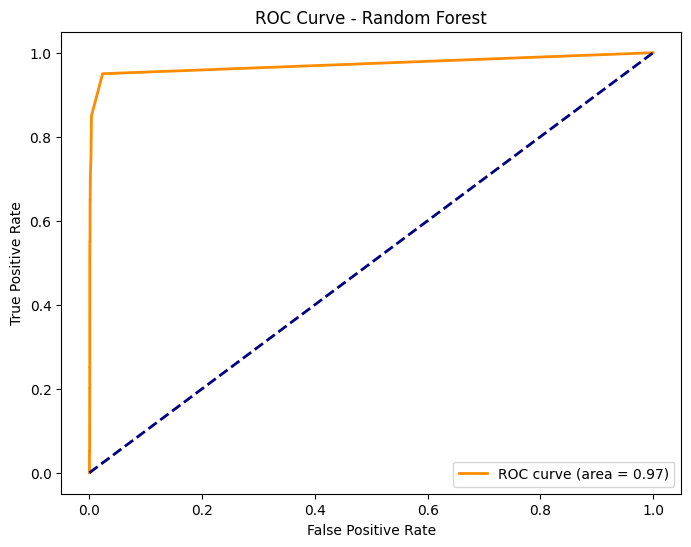

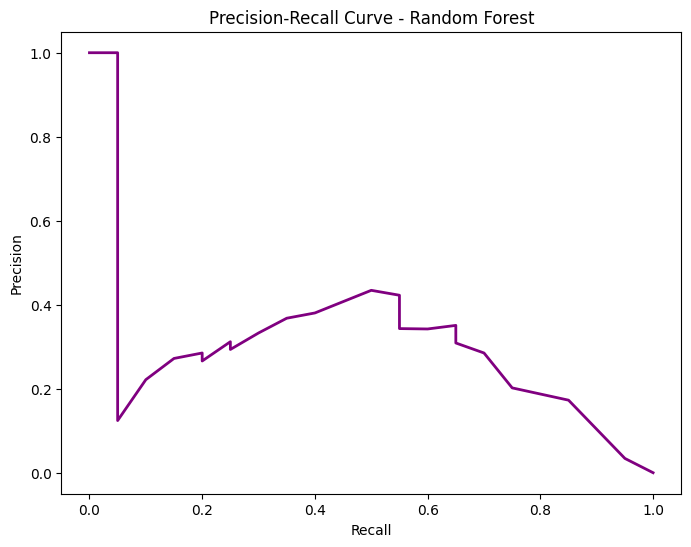

Plotting for Decision Tree...


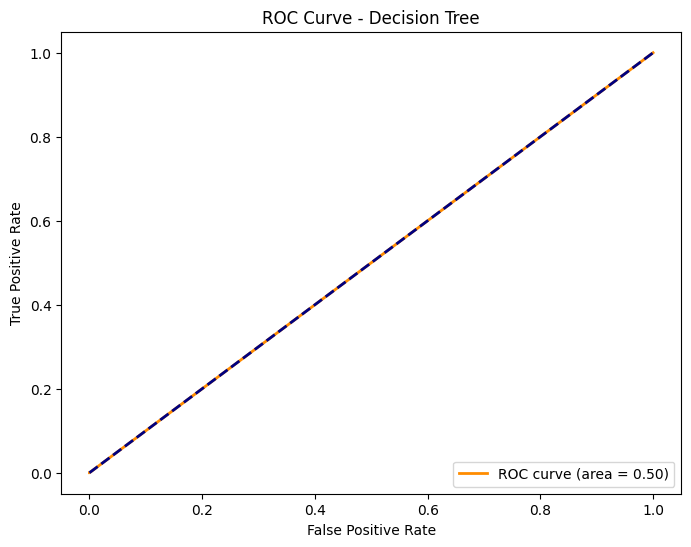

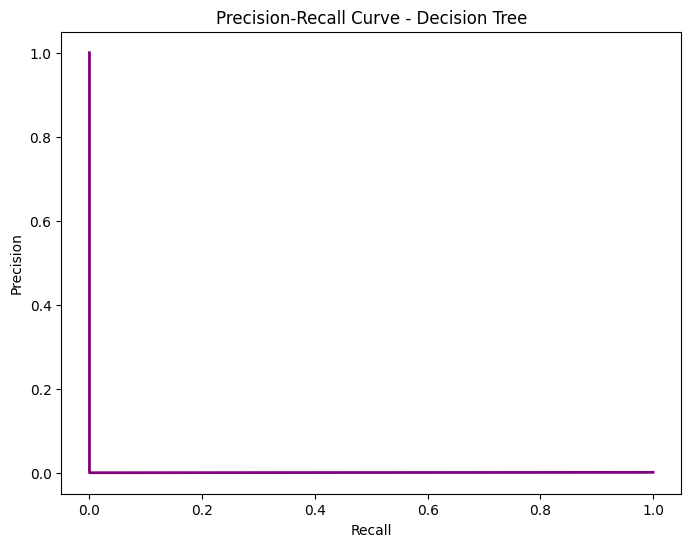

Plotting for Logistic Regression...


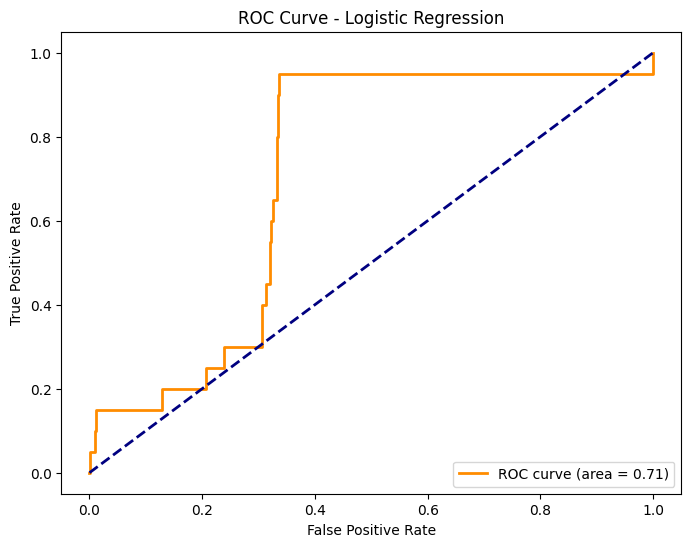

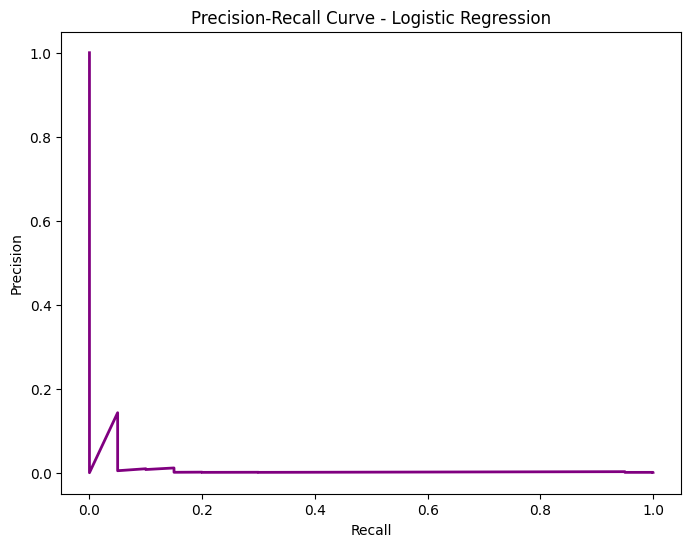

Plotting for XGBoost...


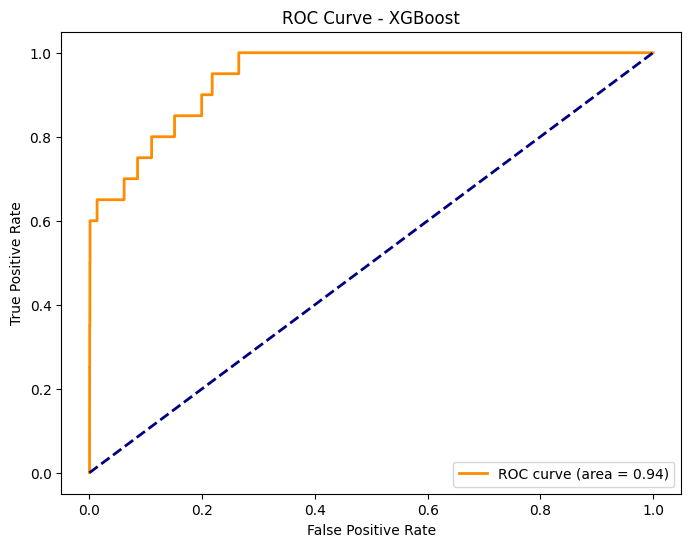

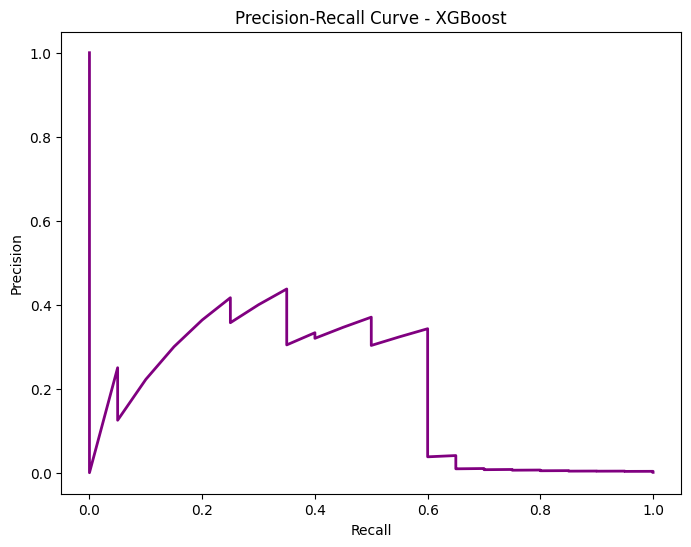

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Use probabilities
    else:
        y_prob = model.predict(DMatrix(X_test))[:, 1]  # For XGBoost Booster API

    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=label_encoder.classes_[1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall Curve
def plot_pr_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Use probabilities
    else:
        y_prob = model.predict(DMatrix(X_test))[:, 1]  # For XGBoost Booster API

    precision, recall, thresholds = precision_recall_curve(y_test, y_prob, pos_label=label_encoder.classes_[1])

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='purple', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.show()

# Plot ROC and Precision-Recall curves for all models
models = {
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "Logistic Regression": logreg_model,
    "XGBoost": xgb_model
}

for model_name, model in models.items():
    print(f"Plotting for {model_name}...")
    plot_roc_curve(model, X_test, y_test, model_name)
    plot_pr_curve(model, X_test, y_test, model_name)


The odd behavior of the Decision Tree ROC curve suggests that the model is not making meaningful probabilistic predictions, which is common for decision trees due to their discrete decision boundaries. Here's why and how you can address it:

###Why the ROC Curve Looks Odd:
Lack of Probabilistic Outputs:

Decision trees don't inherently predict probabilities well because they are rule-based. The predict_proba method often returns "hard" probabilities (e.g., 0 or 1), leading to a less informative ROC curve.
Imbalanced Data:

If the dataset is imbalanced, the decision tree might predict only the majority class for certain thresholds, resulting in an uninformative curve.
Overfitting:

Decision trees can overfit, especially on training data, leading to poor generalization on unseen data.

####Steps to Fix or Improve the Visualization:
Calibrate Probabilities:

Use probability calibration techniques like CalibratedClassifierCV to improve probabilistic predictions.

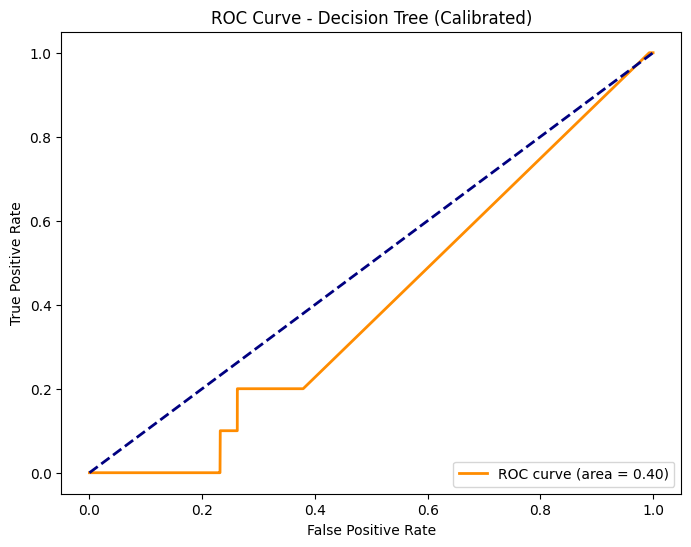

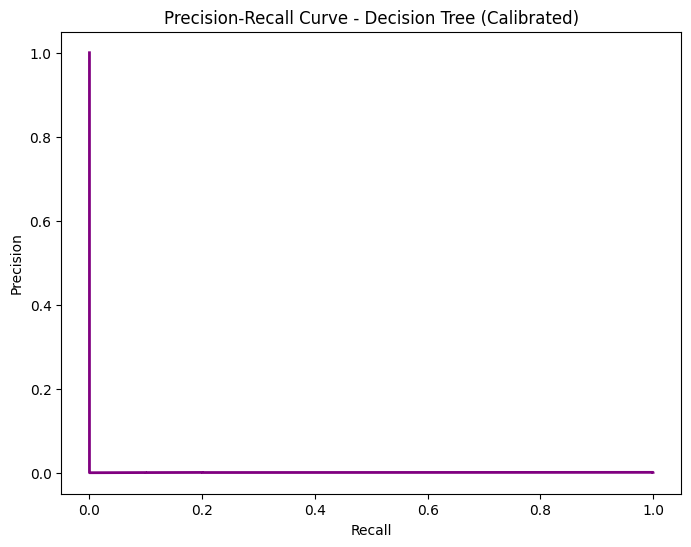

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_dt = CalibratedClassifierCV(dt_model, method='sigmoid', cv='prefit')
calibrated_dt.fit(X_train_final, y_train_final)

# Use the calibrated model for ROC curve
plot_roc_curve(calibrated_dt, X_test, y_test, "Decision Tree (Calibrated)")
plot_pr_curve(calibrated_dt, X_test, y_test, "Decision Tree (Calibrated)")

###Models Comparison Plot

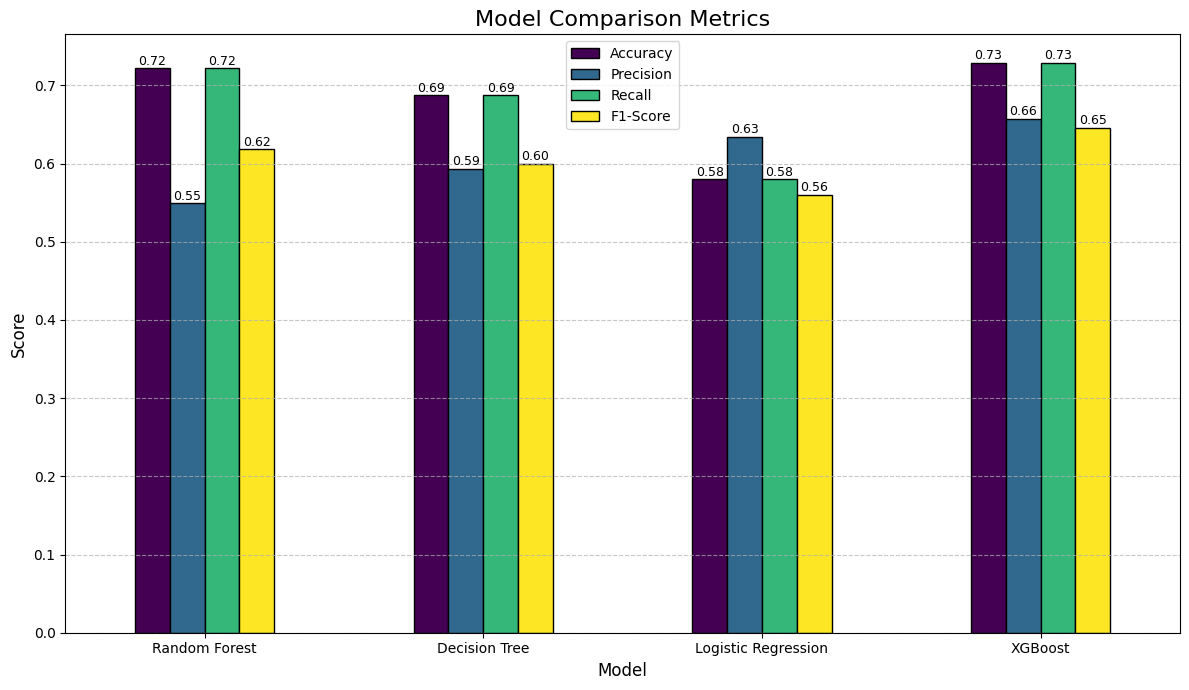

In [ ]:
# Plot comparison of metrics with enhancements
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost'],
    'Accuracy': [accuracy_rf, accuracy_dt, accuracy_logreg, accuracy_xgb],
    'Precision': [precision_rf, precision_dt, precision_logreg, precision_xgb],
    'Recall': [recall_rf, recall_dt, recall_logreg, recall_xgb],
    'F1-Score': [f1_rf, f1_dt, f1_logreg, f1_xgb]
}).set_index('Model')

ax = metrics_df.plot(kind='bar', figsize=(12, 7), rot=0, colormap='viridis', edgecolor='black')

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title and labels
plt.title('Model Comparison Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.legend(loc='upper center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()
